# **Data Augmentation**
- Data augmentation is simple and smart technique using which you reduce overfitting.
- you generate more photo from one photo by different technique shifting, rotating, zoom in, zoom out etc.

## for single image

In [ ]:
from keras.preprocessing import image

In [ ]:
img = image.load_img("/content/cat.78.jpg", target_size=(200,200))

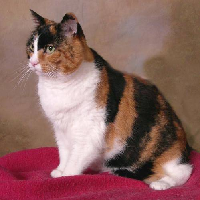

In [ ]:
img

In [ ]:
img_np = image.img_to_array(img)

In [ ]:
img_np.shape

(200, 200, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
img_np = img_np.reshape(1,200,200,3)

In [ ]:
i = 0

# working with single image use datagen.flow()
for batch in datagen.flow(img_np, batch_size=1,
                          save_to_dir='/content/preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 10:
        break  # otherwise the generator would loop indefinitely

## for large set of images

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
train_datagen = train_datagen.flow_from_directory("/content/preview")

Found 0 images belonging to 0 classes.


In [ ]:
# while training you have to use fit_generator()
# model.fit_generator(train_datagen, steps_per_epoch=100, epochs=10)

#steps_per_epoch is how many images should be generated per epoch